## Irreducible active flows: effect of plane boundaries 

The expression of fluid flow can be written in terms of modes of the force per unit area and surface slip. These include

$$\boldsymbol{v}^{1s}(\boldsymbol{r})=-(1+\tfrac{b^{2}}{6}\nabla^{2})\,\mathbf{G}\cdot\mathbf{F}^{(1s)},$$
$$\boldsymbol{v}^{2s}(\boldsymbol{r})=\tfrac{28\pi\eta b^{2}}{3}(1+\tfrac{b^{2}}{10}\nabla^{2})\,\boldsymbol{\nabla}\mathbf{G}\cdot\mathbf{V}^{(2s)},$$
$$\boldsymbol{v}^{3t}(\boldsymbol{r})=\tfrac{2\pi\eta b^{3}}{5}\nabla^{2}\mathbf{G}\cdot\mathbf{V}^{(3t)}$$

We emphasise that these expressions are valid for any Green's function of the Stokes equation, provided they satisfy the additional boundary conditions that may be imposed. 

Our second example illustrates how irreducible flows are modified by the proximity to plane boundaries. This is of relevance to experiments, where confinement by boundaries is commonplace [#goldstein2015green, #thutupalli2018FIPS]. This also illustrates the flexibility of our method, as the only quantity that needs to be changed is the Green's function. The Green's function for a no-slip wall is the Lorentz-Blake tensor

$$
G_{\alpha\beta}^{\text{w}}(\boldsymbol{R}_{i},\,\boldsymbol{R}_{j})	=	G_{\alpha\beta}^{\text{o}}(\boldsymbol{r}_{ij})-G_{\alpha\beta}^{\text{o}}(\boldsymbol{r}_{ij}^{*})-2h\nabla_{{\scriptscriptstyle \boldsymbol{r}_{\gamma}^{*}}}G_{\alpha3}^{\text{o}}(\boldsymbol{r}_{ij}^{*})\mathcal{M}_{\beta\gamma}+h^{2}\nabla_{{\scriptscriptstyle \boldsymbol{r}^{*}}}^{2}G_{\alpha\gamma}^{\text{o}}(\boldsymbol{r}_{ij}^{*})\mathcal{M}_{\beta\gamma}.Here \boldsymbol{r}_{ij}^{*}=\mathbf{\boldsymbol{R}}_{i}-\mathbf{\boldsymbol{R}}_{j}^{*},
$$

where $\boldsymbol{R}_{j}^{*}=\boldsymbol{\mathcal{M}}\cdot\boldsymbol{R}$ is the image of the j-th colloid at a distance h from plane boundary and $\boldsymbol{\mathcal{M}}=\boldsymbol{I}-2\mathbf{\hat{z}}\mathbf{\hat{z}}$ is the reflection operator. The Green's function for a no-shear plane air-water interface is

$$
G_{\alpha\beta}^{\text{i}}(\boldsymbol{R}_{i},\,\boldsymbol{R}_{j})	=	G_{\alpha\beta}^{\text{o}}(\boldsymbol{r}_{ij})+(\delta_{\beta\rho}\delta_{\rho\gamma}-\delta_{\beta3}\delta_{3\gamma})G_{\alpha\gamma}^{\text{o}}(\boldsymbol{r}_{ij}^{*}).
$$
The plane boundary is placed at z=0 and the flows are plotted in the half-space z>0. 

In [1]:
## ex2 : comparison of flow around an active colloid near a plane surface ( wall and interface )
import pystokes
import numpy as np, matplotlib.pyplot as plt

In [2]:
# particle radius, fluid viscosity, and number of particles
b, eta, Np = 1.0, 1.0/6.0, 1

#initialise position, orientation and body force on the colloid
r, p, F = np.array([0.0, 0.0, 3.4]), np.array([0.0, 0.0, -1]),  np.array([0.0, 0.0, 1])

# irreducible coeffcients
V2s = pystokes.utils.irreducibleTensors(2, p)
V3t = pystokes.utils.irreducibleTensors(1, p)

In [3]:
# space dimension , extent , discretization
dim, L, Ng = 3, 10, 128

#Instantiate the Flow class near a planw wall and interface
wFlow = pystokes.wallBounded.Flow(radius=b, particles=Np, viscosity=eta, gridpoints=Ng*Ng)
iFlow = pystokes.interface.Flow(radius=b, particles=Np, viscosity=eta, gridpoints=Ng*Ng)

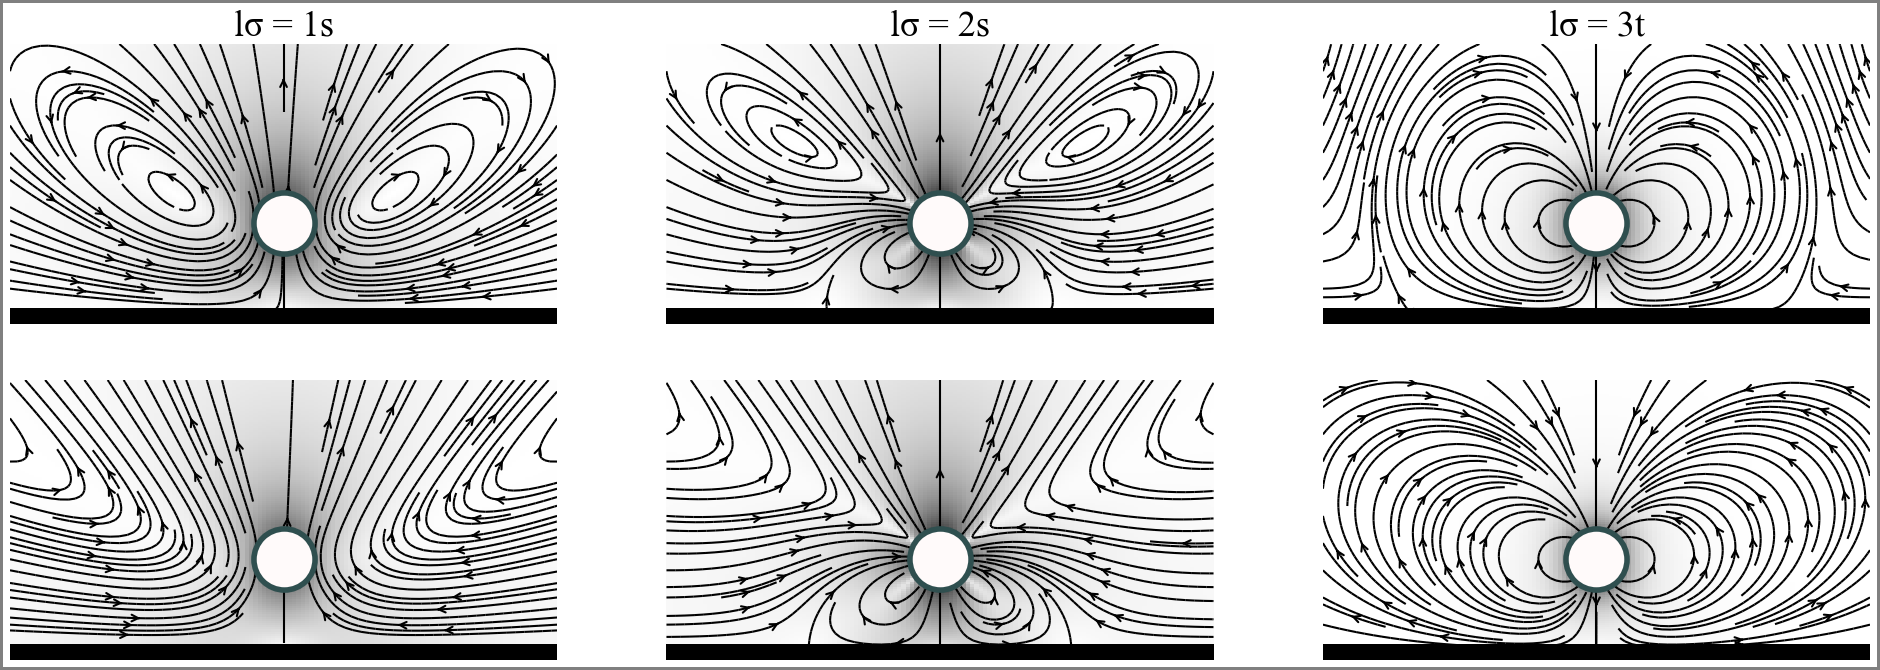

In [4]:
%matplotlib inline
plt.figure(figsize=(24, 8), edgecolor='gray', linewidth=4)
plt.rcParams["font.family"] = "Times New Roman"

# create the grid
rr, vv = pystokes.utils.gridYZ(dim, L, Ng)

plt.subplot(231);  vv=vv*0; 
wFlow.flowField1s(vv, rr, r, F)  
pystokes.utils.plotStreamlinesYZsurf(vv, rr, r, ms=44,offset=1e-1, title='lσ = 1s', density=2)

plt.subplot(232);   vv=vv*0; 
wFlow.flowField2s(vv, rr, r, V2s)  
pystokes.utils.plotStreamlinesYZsurf(vv, rr, r, ms=44, offset=1e-1, title='lσ = 2s', density=2)

plt.subplot(233); vv=vv*0; 
wFlow.flowField3t(vv, rr, r, V3t)  
pystokes.utils.plotStreamlinesYZsurf(vv, rr, r, ms=44,offset=4e-2, title='lσ = 3t', density=2)

plt.subplot(234);  vv=vv*0; 
iFlow.flowField1s(vv, rr, r, F)  
pystokes.utils.plotStreamlinesYZsurf(vv, rr, r, ms=44,offset=4e-1, title='None', density=2)

plt.subplot(235);   vv=vv*0; 
iFlow.flowField2s(vv, rr, r, V2s)  
pystokes.utils.plotStreamlinesYZsurf(vv, rr, r, ms=44,offset=1e-1, title='None', density=2)

plt.subplot(236); vv=vv*0; 
iFlow.flowField3t(vv, rr, r, V3t)  
pystokes.utils.plotStreamlinesYZsurf(vv, rr, r, ms=44,offset=6e-2, title='None', density=2)